# Milestone 3 (Exploratory Data Analysis and Data Cleaning)

In [11]:
#Getting key statistics for each column
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, when, isnull

df = spark.read.csv('xxx', header=True, inferSchema=True)

num_observations = df.count()
print(f'Number of observations: {num_observations}')

variables = df.columns
print(f'List of variables: {variables}')

missing_values = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).collect()[0].asDict()
print('Number of missing fields in each column:')
print(missing_values)

numeric_stats = df.describe().show()

from pyspark.sql.functions import min, max, avg, stddev

stats = df.select([min(c).alias(f"{c}_min") for c in df.columns if df.schema[c].dataType in ['IntegerType', 'DoubleType']]).union(
    df.select([max(c).alias(f"{c}_max") for c in df.columns if df.schema[c].dataType in ['IntegerType', 'DoubleType']])).union(
    df.select([avg(c).alias(f"{c}_avg") for c in df.columns if df.schema[c].dataType in ['IntegerType', 'DoubleType']])).union(
    df.select([stddev(c).alias(f"{c}_stddev") for c in df.columns if df.schema[c].dataType in ['IntegerType', 'DoubleType']])
)
stats.show()

24/10/15 02:13:20 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


Number of observations: 82138753
List of variables: ['legId', 'searchDate', 'flightDate', 'startingAirport', 'destinationAirport', 'fareBasisCode', 'travelDuration', 'elapsedDays', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'baseFare', 'totalFare', 'seatsRemaining', 'totalTravelDistance', 'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw', 'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode', 'segmentsAirlineName', 'segmentsAirlineCode', 'segmentsEquipmentDescription', 'segmentsDurationInSeconds', 'segmentsDistance', 'segmentsCabinCode']


24/10/15 02:14:57 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Number of missing fields in each column:
{'legId': 0, 'searchDate': 0, 'flightDate': 0, 'startingAirport': 0, 'destinationAirport': 0, 'fareBasisCode': 0, 'travelDuration': 0, 'elapsedDays': 0, 'isBasicEconomy': 0, 'isRefundable': 0, 'isNonStop': 0, 'baseFare': 0, 'totalFare': 0, 'seatsRemaining': 0, 'totalTravelDistance': 6094532, 'segmentsDepartureTimeEpochSeconds': 0, 'segmentsDepartureTimeRaw': 0, 'segmentsArrivalTimeEpochSeconds': 0, 'segmentsArrivalTimeRaw': 0, 'segmentsArrivalAirportCode': 0, 'segmentsDepartureAirportCode': 0, 'segmentsAirlineName': 0, 'segmentsAirlineCode': 0, 'segmentsEquipmentDescription': 1557592, 'segmentsDurationInSeconds': 0, 'segmentsDistance': 0, 'segmentsCabinCode': 0}


+-------+--------------------+---------------+------------------+-------------+--------------+-------------------+------------------+------------------+------------------+-------------------+---------------------------------+------------------------+-------------------------------+----------------------+--------------------------+----------------------------+--------------------+-------------------+----------------------------+-------------------------+--------------------+--------------------+
|summary|               legId|startingAirport|destinationAirport|fareBasisCode|travelDuration|        elapsedDays|          baseFare|         totalFare|    seatsRemaining|totalTravelDistance|segmentsDepartureTimeEpochSeconds|segmentsDepartureTimeRaw|segmentsArrivalTimeEpochSeconds|segmentsArrivalTimeRaw|segmentsArrivalAirportCode|segmentsDepartureAirportCode| segmentsAirlineName|segmentsAirlineCode|segmentsEquipmentDescription|segmentsDurationInSeconds|    segmentsDistance|   segmentsCabinCode|


In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, isnull, avg, min, max, stddev
import pandas as pd

df = spark.read.csv(file_path, header=True, inferSchema=True)
df.printSchema()

print("Data loading finished.")

24/10/16 21:02:32 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


root
 |-- legId: string (nullable = true)
 |-- searchDate: date (nullable = true)
 |-- flightDate: date (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: integer (nullable = true)
 |-- isBasicEconomy: boolean (nullable = true)
 |-- isRefundable: boolean (nullable = true)
 |-- isNonStop: boolean (nullable = true)
 |-- baseFare: double (nullable = true)
 |-- totalFare: double (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- totalTravelDistance: integer (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: s

In [6]:
#How I found the missing fields for each column
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when

missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).collect()[0].asDict()

print('Number of missing fields in each column:')
for column, count in missing_values.items():
    print(f"{column}: {count}")

24/10/16 21:16:31 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Number of missing fields in each column:
legId: 0
searchDate: 0
flightDate: 0
startingAirport: 0
destinationAirport: 0
fareBasisCode: 0
travelDuration: 0
elapsedDays: 0
isBasicEconomy: 0
isRefundable: 0
isNonStop: 0
baseFare: 0
totalFare: 0
seatsRemaining: 0
totalTravelDistance: 6094532
segmentsDepartureTimeEpochSeconds: 0
segmentsDepartureTimeRaw: 0
segmentsArrivalTimeEpochSeconds: 0
segmentsArrivalTimeRaw: 0
segmentsArrivalAirportCode: 0
segmentsDepartureAirportCode: 0
segmentsAirlineName: 0
segmentsAirlineCode: 0
segmentsEquipmentDescription: 1557592
segmentsDurationInSeconds: 0
segmentsDistance: 0
segmentsCabinCode: 0


In [7]:
#Checking if there's any duplicate data
total_records = df.count()
unique_records = df.dropDuplicates().count()
duplicate_records = total_records - unique_records

print(f"Total records: {total_records}")
print(f"Unique records: {unique_records}")
print(f"Duplicate records: {duplicate_records}")

Total records: 82138753
Unique records: 82138753
Duplicate records: 0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

#Reading the original CSV file
df_original = spark.read.csv("xxx", header=True, inferSchema=True)

#Dropping unnecessary columns
columns_to_drop = ["totalTravelDistance", "segmentsEquipmentDescription"]
df_cleaned = df_original.drop(*columns_to_drop)

#Converting to a new CSV file
df_cleaned.write.csv("xxx", header=True)

In [2]:
#Using coalesce to convert into a parquet file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

df_original = spark.read.csv("xxx", header=True, inferSchema=True)
df_cleaned.coalesce(1).write.parquet("xxx")

In [4]:
#The 10 Most Common Starting/Destination Airports
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc

spark = SparkSession.builder.appName("MostCommonAirports").getOrCreate()

common_starting_airports = df_cleaned.groupBy("startingAirport").count().orderBy(desc("count"))
common_starting_airports.show(10, truncate=False)  

common_destination_airports = df_cleaned.groupBy("destinationAirport").count().orderBy(desc("count"))
common_destination_airports.show(10, truncate=False) 

+---------------+-------+
|startingAirport|count  |
+---------------+-------+
|LAX            |8073281|
|LGA            |5919323|
|BOS            |5883876|
|SFO            |5706482|
|DFW            |5674959|
|ORD            |5503476|
|CLT            |5494510|
|ATL            |5312028|
|MIA            |4930213|
|PHL            |4726187|
+---------------+-------+
only showing top 10 rows



+------------------+-------+
|destinationAirport|count  |
+------------------+-------+
|LAX               |8006721|
|LGA               |6093450|
|DFW               |5957280|
|BOS               |5801538|
|ORD               |5717699|
|SFO               |5586204|
|CLT               |5411448|
|ATL               |5211169|
|MIA               |5103390|
|PHL               |4703822|
+------------------+-------+
only showing top 10 rows



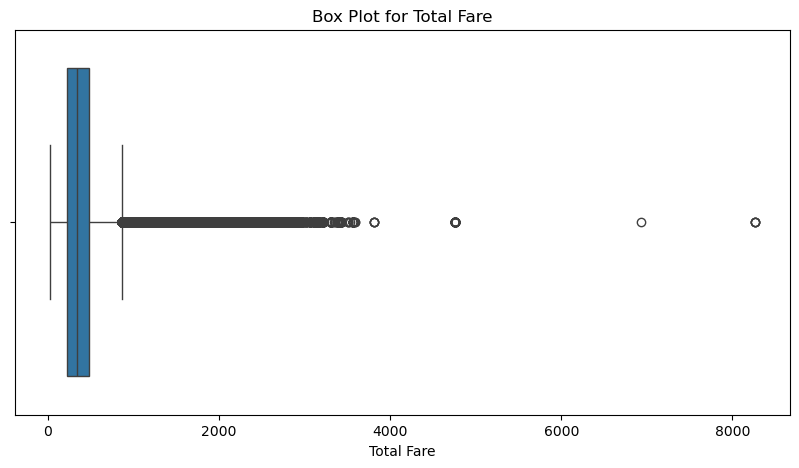

In [3]:
#Box Plot using Total Fare for Outliers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Limited number of rows
df_totalFare_spark = df_spark.select("totalFare").limit(10000000)

df_totalFare = df_totalFare_spark.toPandas()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_totalFare['totalFare'])
plt.title('Box Plot for Total Fare')
plt.xlabel('Total Fare')
plt.show()

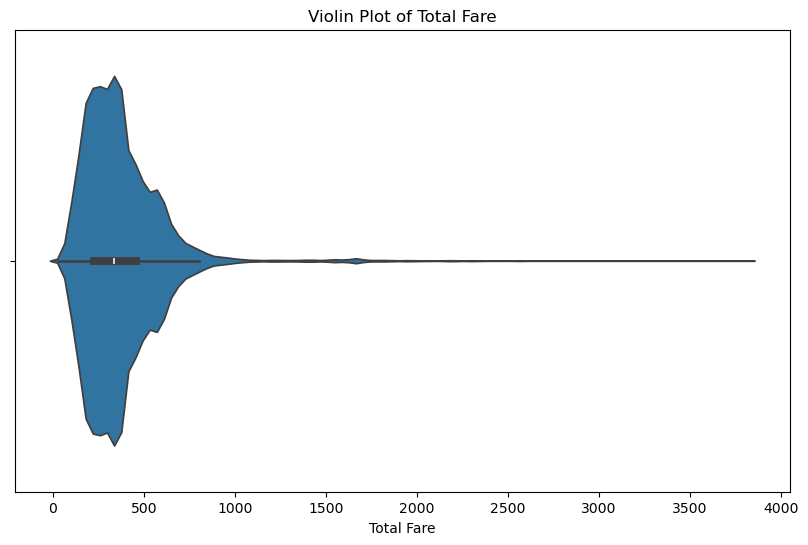

In [6]:
# Violin plot for totalFare
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_totalFare['totalFare'])
plt.title('Violin Plot of Total Fare')
plt.xlabel('Total Fare')
plt.show()

In [2]:
#Finding top 5 rows for each column
df_spark = spark.read.parquet('xxx')

df_spark.select('segmentsAirlineCode').show(5)

df_spark.select('segmentsCabinCode').show(5)

df_spark.select('travelDuration').show(5)

df_spark.select('fareBasisCode').show(5)

df_spark.select('isNonStop').show(5)

df_spark.select('isRefundable').show(5)

df_spark.select('searchDate').show(5)

df_spark.select('elapsedDays').show(5)

+-------------------+
|segmentsAirlineCode|
+-------------------+
|                 DL|
|                 DL|
|                 DL|
|                 DL|
|                 DL|
+-------------------+
only showing top 5 rows



+-----------------+
|segmentsCabinCode|
+-----------------+
|            coach|
|            coach|
|            coach|
|            coach|
|            coach|
+-----------------+
only showing top 5 rows

+--------------+
|travelDuration|
+--------------+
|       PT2H29M|
|       PT2H30M|
|       PT2H30M|
|       PT2H32M|
|       PT2H34M|
+--------------+
only showing top 5 rows

+-------------+
|fareBasisCode|
+-------------+
|     LA0NX0MC|
|     LA0NX0MC|
|     LA0NX0MC|
|     LA0NX0MC|
|     LA0NX0MC|
+-------------+
only showing top 5 rows

+---------+
|isNonStop|
+---------+
|     true|
|     true|
|     true|
|     true|
|     true|
+---------+
only showing top 5 rows

+------------+
|isRefundable|
+------------+
|       false|
|       false|
|       false|
|       false|
|       false|
+------------+
only showing top 5 rows

+----------+
|searchDate|
+----------+
|2022-04-16|
|2022-04-16|
|2022-04-16|
|2022-04-16|
|2022-04-16|
+----------+
only showing top 5 rows

+-----------+

In [14]:
#Finding information for fareBasisCode
from pyspark.sql import functions as F

common_fare_basis = df_spark.groupBy("fareBasisCode").count()
common_fare_basis_ordered = common_fare_basis.orderBy(F.desc("count"))
common_fare_basis_ordered.show(10)

+-------------+-------+
|fareBasisCode|  count|
+-------------+-------+
|     QAA0OKEN|1386883|
|     KAUOA0MQ| 937072|
|     V7AWZNN1| 797408|
|     QAA0OFEN| 570964|
|     HAA0OKEN| 537443|
|     G7AWZNN1| 470363|
|     KAVOA0MQ| 438196|
|     KA0NA0MC| 398620|
|     V0AHZNN1| 393533|
|     L0AIZNN1| 369229|
+-------------+-------+
only showing top 10 rows




[Stage 16:=========================================>                (5 + 2) / 7]



In [5]:
#Converting CSV to a parquet file
csv_path = "xxx"
df = spark.read.option("header", "true").csv(csv_path)

parquet_output_path = "xxx"
df.write.mode("overwrite").parquet(parquet_output_path)

In [6]:
#Finding first 5 rows of the dataset
df_check = spark.read.parquet("xxx")
df_check.show(5)
print("Row count:", df_check.count())


[Stage 9:>                                                          (0 + 1) / 1]



+--------------------+----------+----------+---------------+------------------+-------------+--------------+-----------+--------------+------------+---------+--------+---------+--------------+---------------------------------+------------------------+-------------------------------+----------------------+--------------------------+----------------------------+--------------------+-------------------+-------------------------+----------------+-----------------+
|               legId|searchDate|flightDate|startingAirport|destinationAirport|fareBasisCode|travelDuration|elapsedDays|isBasicEconomy|isRefundable|isNonStop|baseFare|totalFare|seatsRemaining|segmentsDepartureTimeEpochSeconds|segmentsDepartureTimeRaw|segmentsArrivalTimeEpochSeconds|segmentsArrivalTimeRaw|segmentsArrivalAirportCode|segmentsDepartureAirportCode| segmentsAirlineName|segmentsAirlineCode|segmentsDurationInSeconds|segmentsDistance|segmentsCabinCode|
+--------------------+----------+----------+---------------+----------

Row count: 82138753


In [7]:
#Cleaning segmentsAirlineCode, segmentsCabinCode, isRefundable and converting into parquet file
df_cleaned = df_check.drop("segmentsAirlineCode", "segmentsCabinCode", "isRefundable")


updated_parquet_output_path = "xxx"
df_cleaned.write.mode("overwrite").parquet(updated_parquet_output_path)

In [3]:
#Finding min and max flightDate
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

df_spark = spark.read.parquet("xxx")

min_max_dates = df_spark.agg(
    F.min("flightDate").alias("min_flightDate"),
    F.max("flightDate").alias("max_flightDate")
)

min_max_dates.show()

+--------------+--------------+
|min_flightDate|max_flightDate|
+--------------+--------------+
|    2022-04-17|    2022-11-19|
+--------------+--------------+



# Milestone 4 (Feature Engineering and Modeling)

In [3]:
#Creating Predictions Model for totalFare
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

data_path = "xxx"
df = spark.read.parquet(data_path)

#Dropping null values just in case
df = df.dropna(subset=["totalFare", "baseFare", "seatsRemaining", "startingAirport", "destinationAirport", "segmentsAirlineCode"])

categorical_cols = ["startingAirport", "destinationAirport", "segmentsAirlineCode"]
numeric_cols = ["baseFare", "seatsRemaining"]
target_col = "totalFare"

indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index") for col in categorical_cols]
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="numeric_features")
scaler = StandardScaler(inputCol="numeric_features", outputCol="scaled_features")
all_features = [f"{col}_index" for col in categorical_cols] + ["scaled_features"]
final_assembler = VectorAssembler(inputCols=all_features, outputCol="features")
lr = LinearRegression(featuresCol="features", labelCol=target_col, predictionCol="prediction")
pipeline = Pipeline(stages=indexers + [assembler, scaler, final_assembler, lr])

#Using a Sample Size
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)
pipeline_model = pipeline.fit(train_data)
predictions = pipeline_model.transform(test_data)

evaluator_rmse = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="r2")

#Finding key statistics
rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

pipeline_model.write().overwrite().save("xxx")
predictions.select("legId", target_col, "prediction").write.mode("overwrite").parquet("xxx")

24/11/12 01:40:56 WARN Instrumentation: [2ceefb28] regParam is zero, which might cause numerical instability and overfitting.


Root Mean Squared Error (RMSE): 13.92593164825213
R-squared (R2): 0.9949473527360313


In [7]:
df.printSchema()

root
 |-- legId: string (nullable = true)
 |-- searchDate: string (nullable = true)
 |-- flightDate: string (nullable = true)
 |-- startingAirport: string (nullable = true)
 |-- destinationAirport: string (nullable = true)
 |-- fareBasisCode: string (nullable = true)
 |-- travelDuration: string (nullable = true)
 |-- elapsedDays: string (nullable = true)
 |-- isBasicEconomy: string (nullable = true)
 |-- isNonStop: string (nullable = true)
 |-- baseFare: double (nullable = true)
 |-- totalFare: string (nullable = true)
 |-- seatsRemaining: integer (nullable = true)
 |-- segmentsDepartureTimeEpochSeconds: string (nullable = true)
 |-- segmentsDepartureTimeRaw: string (nullable = true)
 |-- segmentsArrivalTimeEpochSeconds: string (nullable = true)
 |-- segmentsArrivalTimeRaw: string (nullable = true)
 |-- segmentsArrivalAirportCode: string (nullable = true)
 |-- segmentsDepartureAirportCode: string (nullable = true)
 |-- segmentsAirlineName: string (nullable = true)
 |-- segmentsDuration

In [22]:
#Getting Predictions for totalFare
predictions_path = "xxx"
predictions_df = spark.read.parquet(predictions_path)

predictions_df.show(50)

+--------------------+---------+------------------+
|               legId|totalFare|        prediction|
+--------------------+---------+------------------+
|0000606b4f492009f...|    567.2| 559.6954788607804|
|0000a1ddcbc75a555...|   466.61| 464.6086603509158|
|0000b1d0849d0a57b...|    266.6| 280.4765479245457|
|0000fa8b4a7d87760...|    108.6|114.39757328565281|
|0000fa8b4a7d87760...|    108.6|114.39757328565281|
|0000fcd4adff61fa5...|    315.6| 331.7192792625999|
|000175f2039cf317f...|    710.6| 705.5019931448012|
|00017c52fca6543ff...|    352.6|366.08858829463315|
|00017fa2e84336ad9...|    488.6|491.09724296781064|
|000247b8444e2d793...|    509.1| 508.0823490513128|
|00025c179c798575c...|    367.6|381.20034317018377|
|000280e4343980a89...|    172.6|182.35691863171834|
|0002d1d80a375297f...|    445.6|438.77688739045846|
|00033508a850faff8...|    138.6|157.66905094529858|
|00033c1feeb14752e...|    326.6|333.55860523999826|
|00033c1feeb14752e...|    326.6|333.55860523999826|
|00035ba0096

In [26]:
#Finding Key Statistics from Predictions of totalFare, Accessing Linear Regression Model
from pyspark.ml.evaluation import RegressionEvaluator

predictions_path = "xxx"
predictions_df = spark.read.parquet(predictions_path)

evaluator_rmse = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="totalFare", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions_df)
r2 = evaluator_r2.evaluate(predictions_df)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

lr_model = loaded_model.stages[-1]

print("Coefficients:", lr_model.coefficients)
print("Intercept:", lr_model.intercept)

Root Mean Squared Error (RMSE): 13.925931648252083
R-squared (R2): 0.9949473527360314
Coefficients: [0.1394584481736591,0.10611827060547191,0.22298244858027386,195.32881586001366,-7.273361814674778]
Intercept: 40.58924048844299


In [27]:
from pyspark.ml.pipeline import PipelineModel

model_path = "xxx"

loaded_model = PipelineModel.load(model_path)

lr_model = loaded_model.stages[-1]

from pyspark.ml.regression import LinearRegressionModel

if isinstance(lr_model, LinearRegressionModel):
    print("Model Coefficients:", lr_model.coefficients)
    print("Model Intercept:", lr_model.intercept)
else:
    print("Fail!")

Model Coefficients: [0.1394584481736591,0.10611827060547191,0.22298244858027386,195.32881586001366,-7.273361814674778]
Model Intercept: 40.58924048844299


In [ ]:
#Predicting Diff of searchDate & flightDate
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType, DoubleType
from pyspark.sql.functions import col, datediff
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

data_path = "xxx"
df = spark.read.parquet(data_path)

df = df.withColumn("daysUntilFlight", datediff(col("flightDate"), col("searchDate")))

df = df.filter(col("daysUntilFlight") > 0)

df = df.withColumn("baseFare", col("baseFare").cast(DoubleType()))
df = df.withColumn("seatsRemaining", col("seatsRemaining").cast(IntegerType()))

df = df.dropna(subset=["daysUntilFlight", "baseFare", "seatsRemaining", "startingAirport", "destinationAirport"])

categorical_cols = ["startingAirport", "destinationAirport"]
numeric_cols = ["baseFare", "seatsRemaining"]
target_col = "daysUntilFlight"

indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index") for col in categorical_cols]

assembler = VectorAssembler(inputCols=numeric_cols, outputCol="numeric_features")

scaler = StandardScaler(inputCol="numeric_features", outputCol="scaled_features")

feature_cols = [f"{col}_index" for col in categorical_cols] + ["scaled_features"]
final_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

lr = LinearRegression(featuresCol="features", labelCol=target_col, predictionCol="prediction")

pipeline = Pipeline(stages=indexers + [assembler, scaler, final_assembler, lr])

#Splitting the data
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

pipeline_model = pipeline.fit(train_data)

predictions = pipeline_model.transform(test_data)

evaluator_rmse = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

predictions_path = "xxx"
model_path = "xxx"
predictions.select("legId", target_col, "prediction").write.mode("overwrite").parquet(predictions_path)
pipeline_model.write().overwrite().save(model_path)

24/11/13 22:55:26 WARN Instrumentation: [37477ac1] regParam is zero, which might cause numerical instability and overfitting.


Root Mean Squared Error (RMSE): 16.13041879435989
R-squared (R2): 0.023111568956743156


In [30]:
#Getting Predictions Model for daysUntilFlight (Difference of searchDate & flightDate)
predictions_path = "xxx"
predictions_df = spark.read.parquet(predictions_path)
predictions_df.show(50)

+--------------------+---------------+------------------+
|               legId|daysUntilFlight|        prediction|
+--------------------+---------------+------------------+
|0000127cc14ee3561...|             11|27.628601128505906|
|000019591cfd2d4eb...|             37|  27.9509717732128|
|00002c6c6336d555f...|             38|23.543878344411457|
|00004b25b95582a5f...|              9| 28.91427352507564|
|0000e2a7d019d7f5f...|             48| 27.98461522206546|
|000104a297929150b...|             36|20.715816411331257|
|000157009cc2e4560...|             15| 30.10933328987609|
|000171746d9c469d1...|             18| 28.31137941563287|
|0001a56fb4d60cc3e...|             47|30.059857455657884|
|0001a56fb4d60cc3e...|             11|29.926062887271904|
|0001a588df49bdc64...|             18| 25.14477072624059|
|0001ebcbce92de0b6...|             32|26.477006064678214|
|000229a9485e5ee01...|             33|27.450066846414767|
|00023404a34e37b88...|              6|24.763502625454677|
|0002d66907bb3

In [32]:
#Finding Key Statistics from Predictions of Difference for searchDate and flightDate
from pyspark.ml.pipeline import PipelineModel
from pyspark.ml.regression import LinearRegressionModel

model_path = "xxx"

loaded_model = PipelineModel.load(model_path)
regression_model = loaded_model.stages[-1]

if isinstance(regression_model, LinearRegressionModel):
    print("Model Coefficients:", regression_model.coefficients)
    print("Model Intercept:", regression_model.intercept)
else:
    print("Fail!")

Model Coefficients: [0.022974865447223478,0.03164339973320451,-1.1453038676327105,2.2714283482350037]
Model Intercept: 23.65792408220409


# Milestone 5 (Data Visualization)

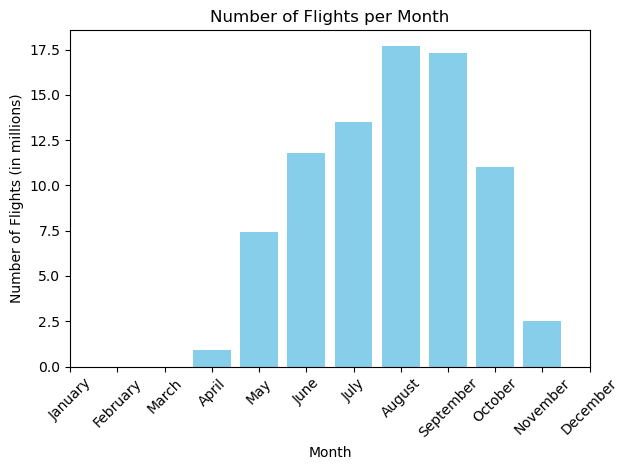

In [13]:
#Creating Bar Chart to Find Frequency of Flights per Month

import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

path = "xxx"
df = spark.read.parquet(path)

#Changed it to sky blue here
plt.bar(flights_per_month_pd["month"], flights_per_month_pd["count"] / 1e6, color="skyblue")
plt.title("Number of Flights per Month")
plt.xlabel("Month")
plt.ylabel("Number of Flights (in millions)")
plt.xticks(range(1, 13), labels=[
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"], rotation=45)
plt.tight_layout()
plt.show()

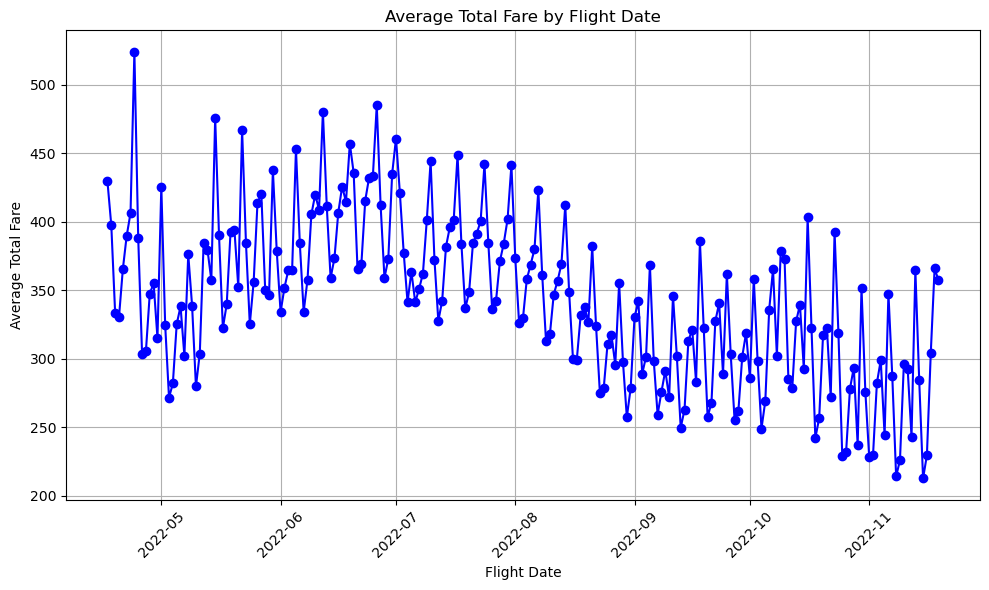

In [5]:
#Creating Line Chart for Average Total Fare by Flight Date
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

df_fare_by_date = df_spark.groupBy("flightDate").agg(F.mean("totalFare").alias("avgTotalFare"))
df_fare_by_date_pd = df_fare_by_date.toPandas()
df_fare_by_date_pd["flightDate"] = pd.to_datetime(df_fare_by_date_pd["flightDate"])

# Sort by flightDate so it's in chronological order
df_fare_by_date_pd = df_fare_by_date_pd.sort_values("flightDate")
plt.figure(figsize=(10, 6))
plt.plot(df_fare_by_date_pd["flightDate"], df_fare_by_date_pd["avgTotalFare"], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel("Flight Date")
plt.ylabel("Average Total Fare")
plt.title("Average Total Fare by Flight Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

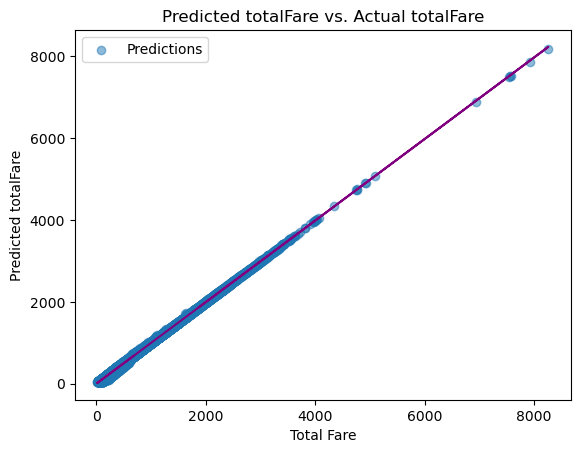

In [12]:
#Scatter Plot for Predicted totalFare vs Actual totalFare
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import functions as F

predictions_path = "xxx"
predictions = spark.read.parquet(predictions_path)

agg_data = predictions.groupBy("totalFare").agg(F.avg("prediction").alias("avg_prediction"))
agg_data_pd = agg_data.toPandas()

plt.scatter(agg_data_pd["totalFare"], agg_data_pd["avg_prediction"], alpha=0.5, label="Predictions")

#Included a trendline here
z = np.polyfit(agg_data_pd["totalFare"], agg_data_pd["avg_prediction"], 1)
p = np.poly1d(z)
plt.plot(agg_data_pd["totalFare"], p(agg_data_pd["totalFare"]), color="purple", linestyle="-")

#Labels and title
plt.title("Predicted totalFare vs. Actual totalFare")
plt.xlabel("Total Fare")
plt.ylabel("Predicted totalFare")
plt.legend()
plt.show()

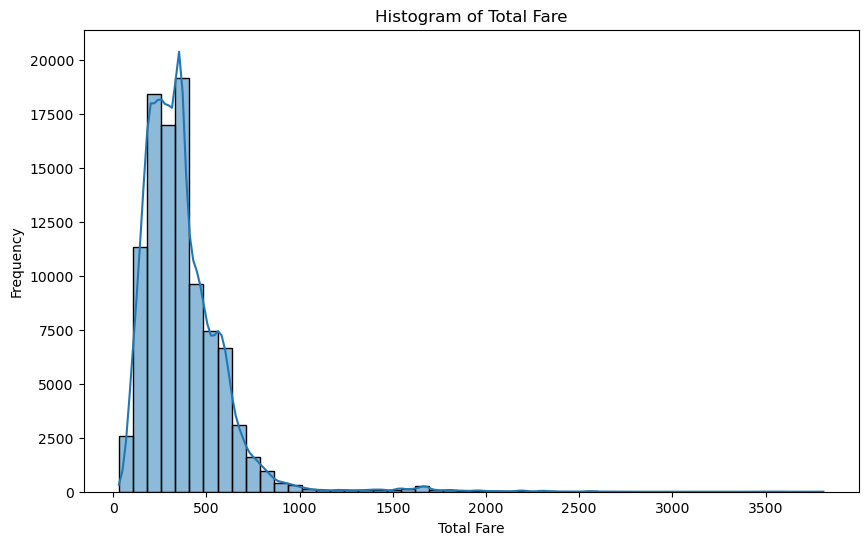

In [5]:
# Histogram of totalFare
plt.figure(figsize=(10, 6))
sns.histplot(df_totalFare['totalFare'], bins=50, kde=True)
plt.title('Histogram of Total Fare')
plt.xlabel('Total Fare')
plt.ylabel('Frequency')
plt.show()

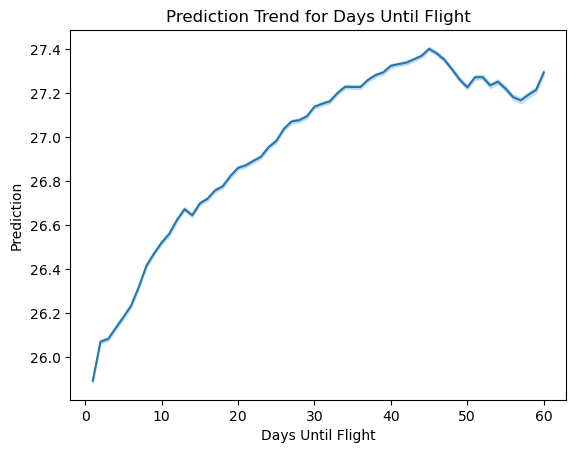

In [22]:
#Creating a Line Chart for Predictions vs daysUntilFlight
import seaborn as sns

sns.lineplot(data=predict, x="daysUntilFlight", y="prediction")
plt.title("Prediction Trend for Days Until Flight")
plt.xlabel("Days Until Flight")
plt.ylabel("Prediction")
plt.show()